In [55]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#Data Explorations

In [57]:
train_data = pd.read_csv('Titanic_train.csv')

In [59]:
test_data = pd.read_csv('Titanic_test.csv')

In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


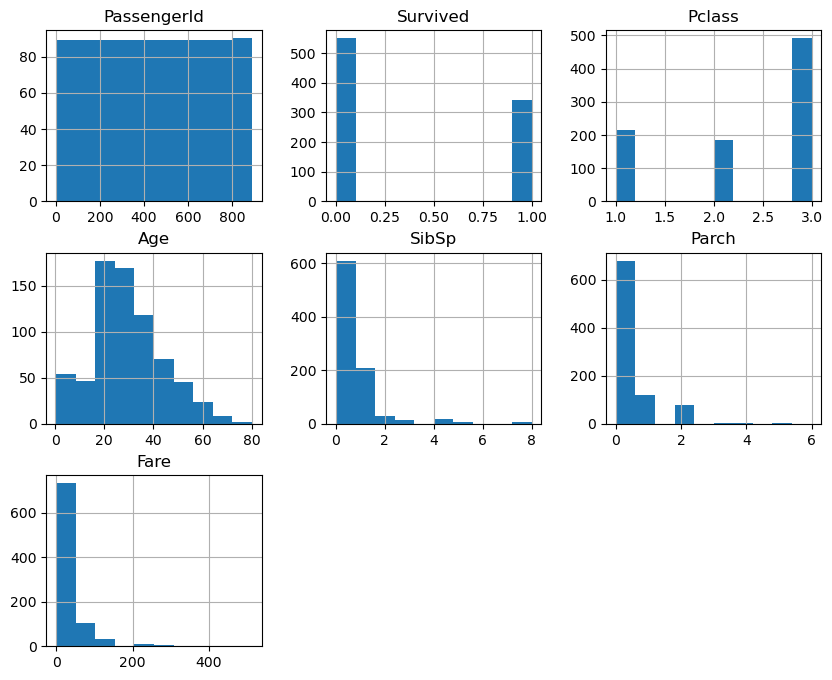

In [69]:
train_data.hist(figsize=(10, 8))
plt.show()

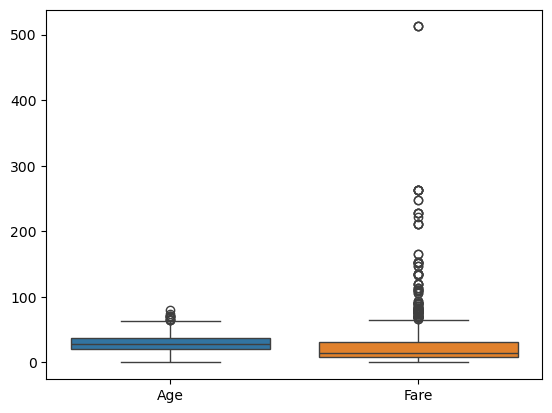

In [71]:
sns.boxplot(data=train_data[['Age', 'Fare']])
plt.show()

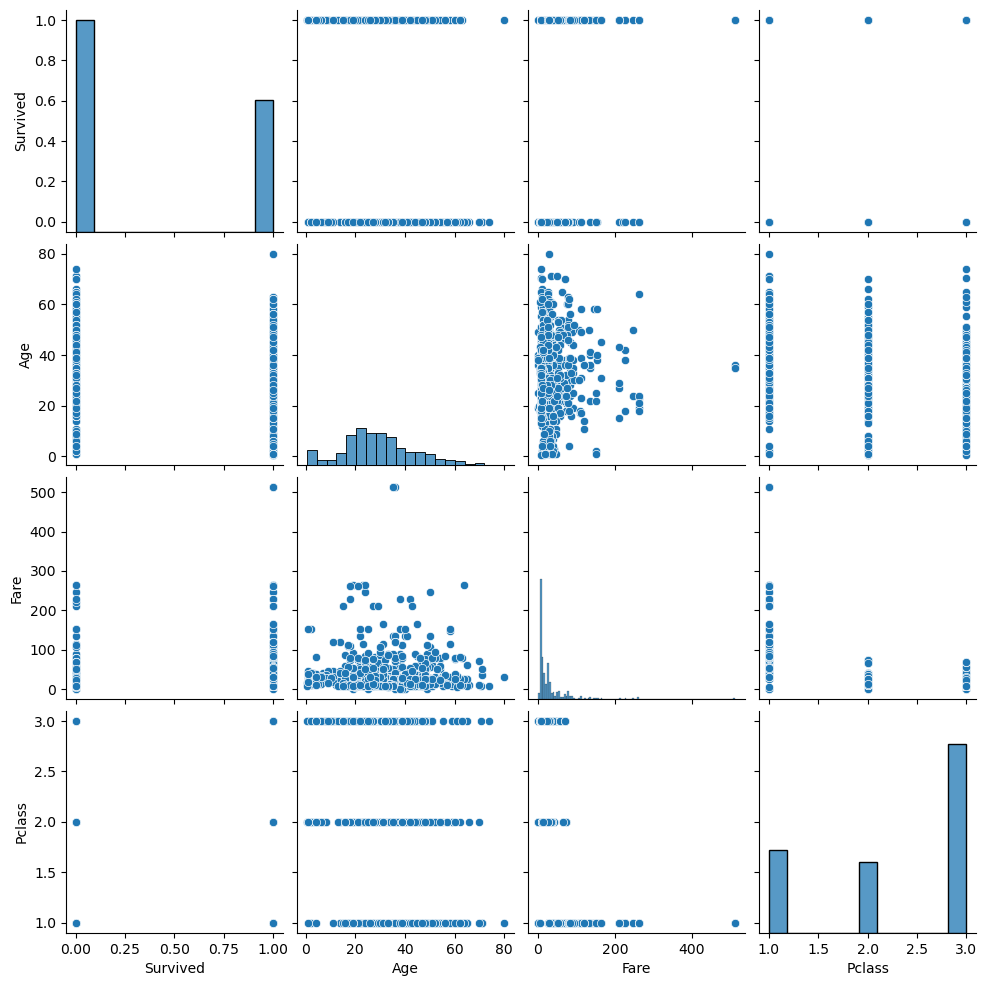

In [73]:
sns.pairplot(train_data[['Survived', 'Age', 'Fare', 'Pclass']])
plt.show()


### Data Preprocessing

In [74]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [75]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [76]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [81]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [83]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [85]:
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

## Model Building

In [87]:
X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']


In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model = LogisticRegression(max_iter=200)

In [93]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Model Evaluation

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [97]:
y_pred = model.predict(X_val)

In [99]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])

In [101]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.8044692737430168
Precision: 0.7910447761194029
Recall: 0.7162162162162162
F1 Score: 0.75177304964539
ROC AUC Score: 0.8755469755469756


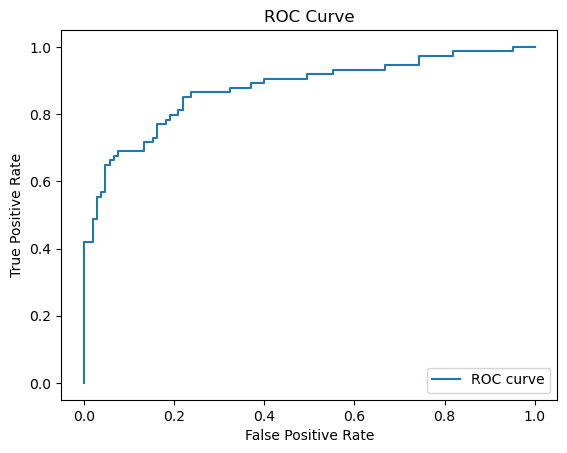

In [103]:
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Interpretation

In [105]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
print(coefficients)

      Feature  Coefficient
0         Age    -0.028662
1       SibSp    -0.292261
2       Parch    -0.130179
3        Fare     0.004244
4    Sex_male    -2.569273
5  Embarked_Q    -0.110217
6  Embarked_S    -0.463493
7    Pclass_2    -0.385039
8    Pclass_3    -1.595807


### Deployment with Streamlit

In [107]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [108]:
import streamlit as st
import pickle

In [109]:
# Save the model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [121]:
# Streamlit app code
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title('Titanic Survival Prediction')

DeltaGenerator()

In [111]:
 #User inputs for features
age = st.number_input('Age', min_value=0, max_value=100)
fare = st.number_input('Fare', min_value=0.0)
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['S', 'C', 'Q'])

In [112]:
# Prepare input data for prediction
input_data = pd.DataFrame([[age, fare, pclass, sex, embarked]], columns=['Age', 'Fare', 'Pclass', 'Sex', 'Embarked'])
input_data = pd.get_dummies(input_data, drop_first=True)


In [113]:
# Predict survival
if st.button('Predict'):
    prediction = model.predict(input_data)
    st.write('Survival Prediction:', 'Survived' if prediction[0] == 1 else 'Did not survive')

In [ ]:
#Interview question and answers

In [ ]:
#1. What is the difference between precision and recall?
#ANS= .Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions made by the model.

# High Precision: Indicates that the model has low false positives (i.e., when the model says an instance is positive, it is likely correct).
# Recall (also called Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all actual positives. It measures how well the model captures all the actual positive cases.
# High Recall: Indicates that the model has low false negatives (i.e., it successfully captures most of the true positive instances).

#Key Difference:

#Precision focuses on the quality of the positive predictions.
#Recall focuses on capturing as many positives as possible.
#Example: In a medical test for a disease:

#Precision is important if the goal is to avoid false positives (i.e., incorrectly diagnosing healthy people).
#Recall is important if the goal is to minimize missed cases of the disease (false negatives).


In [ ]:
#2. What is cross-validation, and why is it important in binary classification?
#ANS = Cross-validation is a technique used to assess how well a model generalizes to unseen data. It involves splitting the dataset into multiple subsets or "folds," training the model on some subsets, and testing it on the remaining subsets. This process is repeated several times, and the results are averaged.

#The most common type is k-fold cross-validation, where the dataset is split into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used once as the test set.


#*Importance in Binary Classification:

#1.Reduces Overfitting: Cross-validation ensures the model is tested on different portions of the data, providing a more reliable measure of its performance across diverse datasets. This helps reduce overfitting (when a model performs well on the training data but poorly on new data).

#2.Provides Robust Performance Estimation: Instead of relying on a single train-test split, cross-validation provides a more robust and less biased estimate of the model's accuracy, precision, recall, F1-score, etc.

#3.Hyperparameter Tuning: Cross-validation is often used in hyperparameter tuning (e.g., using grid search or random search) to find the best parameters that optimize the models performance across all folds, ensuring it generalizes /well to unseen data.